In [1]:
import pandas as pd
import numpy as np
import random
import datetime as dt
import calendar
import os
#loads data using all filepaths
import glob
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
timestr = time.strftime("%Y%m%d-%H%M%S")
print (timestr)

20220814-224355


In [3]:
#phone: [Price, Weight (1-12, 12 being the most frequntly purchased)]
phones = { 'iPhone 13':[1000, 12],
          'iPhone 12':[700,8],
          'Samsung Galexy S22':[1100,10],
          'Samsung Galexy S21':[800,7],
          'Samsung Galexy S10':[300,4],
          'Huawei':[350,7],
          'Nokia c200':[400,4],
          'Google Android': [900,6],
          'iPhone 11':[500, 9],
          'Sony Xperia 10':[700,5],
          'Sony Xperia 5':[450,4],
          'Nokia c100':[200,2]}

In [4]:
# Columns for Dataframe
columns = ['Order ID', 'Phone', 'Quatity Ordered', 'Price Each', 'Order Date', 'Purchase Country_City']

In [5]:
def gen_random_country_city():
    
    companies = ['Sim_Company_1','Sim_Company_2','Sim_Company_3','Sim_Company_4','Sim_Company_5','Sim_Company_6','Sim_Company_7','Sim_Company_8','Sim_Company_9','Sim_Company_10',
               'Sim_Company_11','Sim_Company_12','Sim_Company_13','Sim_Company_14','Sim_Company_15','Sim_Company_16','Sim_Company_17','Sim_Company_18','Sim_Company_19','Sim_Company_20']
    countries = ["China","India","United States","Indonesia","Brazil","Russia","Japan","Mexico","Nigeria","Philippines",
              "Germany","Vietnam","Bangladesh","Turkey","Iran","Egypt","Pakistan","Thailand","Italy","South Africa"]
    weights = [30, 29, 26, 26, 25, 23, 20, 19, 18, 18, 18, 16, 16, 15, 15, 14, 12, 11, 10, 10]
    cities = ["Beijing","Delhi","Boston","Jakarta","Sao Paulo","Moscow","Yokohama","Mexico City","Lagos","Manila",
            "Munich","Hanoi","Dhaka","Ankara","Isfahan","Giza","Islamabad","Bangkok","Milan","Durban"]
    
    index = random.choices(range(len(countries)), weights = weights)[0]
    
    return f"{companies[index]},{cities[index]}, {countries[index]}"



In [6]:
#genderate random date/time in 
def generate_random_dt(month):
    day_range = calendar.monthrange(2022,month)[1]
    random_day = random.randint(1, day_range)
    if random.random() < 0.5:
        date = dt.datetime(2022,month, random_day, 12, 0)
    else:
        date = dt.datetime(2022,month, random_day, 20, 0)
        
    time_offset = np.random.normal(loc=0, scale = 180)
    final_date = date + dt.timedelta(minutes=time_offset)
    
    return final_date.strftime("%d/%m/%y %H:%M ")#


In [7]:
#get names of phones
phone_list = [phone for phone in phones]
weights = [phones[phone][1] for phone in phones]

In [8]:

order_id = 124554

#os.mkdir('Monthly_Data')

for month_val in range (1,13):
    
    if month_val <= 10:
        orders_amt = int(np.random.normal(loc=200, scale=10))
    if month_val == 11:
        orders_amt = int(np.random.normal(loc=350, scale=20 ))
    if month_val == 12:
        orders_amt = int(np.random.normal(loc=500, scale=20))
    df = pd.DataFrame(columns = columns)
    
    for i in range(orders_amt):

        location = gen_random_country_city()
        date = generate_random_dt(month_val)
        
        phone = random.choices(phone_list, weights = weights)[0]
        price = phones[phone][0]
        quantity_ordered = np.random.geometric(p=.6-(1.0/price), size=1)[0]
        df.loc[i] = [order_id, phone, quantity_ordered, price, date, location]
        
        order_id += 1
        
   
    month_name = calendar.month_name[month_val]
    df.to_csv( f"C:/Users/elyn/Documents/ProgDA/Monthly_Data/{month_name}_data.csv", index=False)



In [9]:

# merging all csv files
#annual_df = pd.concat(
#    map(pd.read_csv, ['January_data.csv', 'February_data.csv', 'March_data.csv', 'April_data.csv', 'May_data.csv', 'June_data.csv', 'July_data.csv', 'August_data.csv', 'September_data.csv', 
#                     'October_data.csv', 'November_data.csv', 'December_data.csv']), ignore_index=True)
#annual_df.to_csv("Annual_data.csv", index=False)


# get data file names
path =r'C:\Users\elyn\Documents\ProgDA\Monthly_Data'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
annual_df = pd.concat(dfs, ignore_index=True)
#annual_df["Order Date"] = pd.to_datetime(annual_df["Order Date"])
annual_df = annual_df.sort_values(by="Order Date")
annual_df.to_csv("Annual_data.csv", index=False)

In [10]:
annual_df.dtypes



Order ID                  int64
Phone                    object
Quatity Ordered           int64
Price Each                int64
Order Date               object
Purchase Country_City    object
dtype: object

In [11]:
annual_df

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City
1142,124589,Samsung Galexy S22,3,1100,01/01/22 04:34,"Sim_Company_4,Jakarta, Indonesia"
1300,124747,iPhone 11,1,500,01/01/22 07:38,"Sim_Company_2,Delhi, India"
1294,124741,Sony Xperia 10,2,700,01/01/22 10:42,"Sim_Company_2,Delhi, India"
1195,124642,Samsung Galexy S22,1,1100,01/01/22 15:26,"Sim_Company_14,Ankara, Turkey"
1219,124666,iPhone 11,1,500,01/01/22 17:24,"Sim_Company_11,Munich, Germany"
...,...,...,...,...,...,...
730,127214,Huawei,1,350,31/12/22 18:47,"Sim_Company_7,Yokohama, Japan"
583,127067,iPhone 11,1,500,31/12/22 19:12,"Sim_Company_3,Boston, United States"
650,127134,Huawei,3,350,31/12/22 19:50,"Sim_Company_7,Yokohama, Japan"
851,127335,Samsung Galexy S22,1,1100,31/12/22 22:29,"Sim_Company_12,Hanoi, Vietnam"


## Add columns for Analysis

#### Month Column

In [12]:
annual_df['Month'] = annual_df['Order Date'].str[3:5]
annual_df['Month'] = annual_df['Month'].astype('int32')
annual_df.sample()

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month
413,126897,Huawei,4,350,27/12/22 20:41,"Sim_Company_20,Durban, South Africa",12


In [13]:
annual_df['Quatity Ordered'] = annual_df['Quatity Ordered'].astype('int32')
annual_df['Price Each'] = annual_df['Price Each'].astype('int32')
Sales = (annual_df['Quatity Ordered']) * (annual_df['Price Each'])


In [14]:
annual_df['Month'] = annual_df['Month'].astype('int32')
annual_df.dtypes

Order ID                  int64
Phone                    object
Quatity Ordered           int32
Price Each                int32
Order Date               object
Purchase Country_City    object
Month                     int32
dtype: object

In [15]:
annual_df.loc[annual_df['Quatity Ordered'] == 1, 'No Discount - Single Purchase'] = Sales
annual_df.loc[annual_df['Quatity Ordered'] == 2, 'Sales_Less_Discount(8%)'] = (Sales/100) * 92
annual_df.loc[annual_df['Quatity Ordered'] == 3, 'Sales_Less_Discount(8%)'] = (Sales/100) * 92
annual_df.loc[annual_df['Quatity Ordered'] >= 4, 'Sales_Less_Discount(15%)'] = (Sales/100) * 85
annual_df.loc[annual_df['Quatity Ordered'] >= 4, 'Sales_Less_Discount(15%)'] = (Sales/100) * 85
annual_df['All sales'] = annual_df.fillna(0)['No Discount - Single Purchase'] + annual_df.fillna(0)['Sales_Less_Discount(8%)'] + annual_df.fillna(0)['Sales_Less_Discount(15%)']

In [16]:
annual_df['All sales'] = annual_df.fillna(0)['No Discount - Single Purchase'] + annual_df.fillna(0)['Sales_Less_Discount(8%)'] + annual_df.fillna(0)['Sales_Less_Discount(15%)']


In [17]:
annual_df

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales
1142,124589,Samsung Galexy S22,3,1100,01/01/22 04:34,"Sim_Company_4,Jakarta, Indonesia",1,NaN,3036.0,NaN,3036.0
1300,124747,iPhone 11,1,500,01/01/22 07:38,"Sim_Company_2,Delhi, India",1,500.0,NaN,NaN,500.0
1294,124741,Sony Xperia 10,2,700,01/01/22 10:42,"Sim_Company_2,Delhi, India",1,NaN,1288.0,NaN,1288.0
1195,124642,Samsung Galexy S22,1,1100,01/01/22 15:26,"Sim_Company_14,Ankara, Turkey",1,1100.0,NaN,NaN,1100.0
1219,124666,iPhone 11,1,500,01/01/22 17:24,"Sim_Company_11,Munich, Germany",1,500.0,NaN,NaN,500.0
...,...,...,...,...,...,...,...,...,...,...,...
730,127214,Huawei,1,350,31/12/22 18:47,"Sim_Company_7,Yokohama, Japan",12,350.0,NaN,NaN,350.0
583,127067,iPhone 11,1,500,31/12/22 19:12,"Sim_Company_3,Boston, United States",12,500.0,NaN,NaN,500.0
650,127134,Huawei,3,350,31/12/22 19:50,"Sim_Company_7,Yokohama, Japan",12,NaN,966.0,NaN,966.0
851,127335,Samsung Galexy S22,1,1100,31/12/22 22:29,"Sim_Company_12,Hanoi, Vietnam",12,1100.0,NaN,NaN,1100.0


In [18]:
months_res = annual_df.groupby(('Month'), as_index=False).sum()


In [19]:
months_res

,Month,Order ID,Quatity Ordered,Price Each,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales
0,1,26679538,347,157150,101450.0,97382.0,36890.0,235722.0
1,2,24098559,328,136850,76400.0,107548.0,36210.0,220158.0
2,3,24260961,325,141100,78950.0,123878.0,19465.0,222293.0
3,4,24047991,312,144950,90000.0,99452.0,30812.5,220264.5
4,5,23582539,304,133450,81550.0,91586.0,33065.0,206201.0
5,6,24498045,325,137100,75500.0,108284.0,34850.0,218634.0
6,7,22395515,300,127200,71700.0,95726.0,36295.0,203721.0
7,8,27345286,349,157050,99050.0,106996.0,32045.0,238091.0
8,9,23981484,294,132800,80150.0,94576.0,22780.0,197506.0
9,10,26927460,351,142900,87600.0,97290.0,33830.0,218720.0


### Month plot


Text(0, 0.5, 'Sales in (€)')

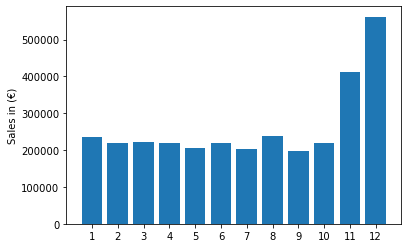

In [20]:

months = range(1,13)

plt.bar(months, months_res['All sales'])
plt.xticks(months)
plt.ylabel("Sales in (€)")

In [21]:
months_res['All sales']

0     235722.0
1     220158.0
2     222293.0
3     220264.5
4     206201.0
5     218634.0
6     203721.0
7     238091.0
8     197506.0
9     218720.0
10    411218.0
11    561855.0
Name: All sales, dtype: float64

### Shop with highest number of sales by city

In [22]:
data_by_bus = annual_df.groupby('Purchase Country_City', as_index=False).sum()
data_by_bus.set_index('Purchase Country_City', inplace=False)
data_by_bus

,Purchase Country_City,Order ID,Quatity Ordered,Price Each,Month,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales
0,"Sim_Company_1,Beijing, China",28480322,359,161000,1722,102950.0,111458.0,26690.0,241098.0
1,"Sim_Company_10,Manila, Philippines",18896817,256,113100,1101,69300.0,69276.0,45560.0,184136.0
2,"Sim_Company_11,Munich, Germany",16005232,201,86300,954,50500.0,66102.0,12750.0,129352.0
3,"Sim_Company_12,Hanoi, Vietnam",15115132,206,79700,882,44900.0,65320.0,15980.0,126200.0
4,"Sim_Company_13,Dhaka, Bangladesh",15496027,203,89900,905,56350.0,59110.0,25712.5,141172.5
5,"Sim_Company_14,Ankara, Turkey",16387230,234,94900,998,51150.0,75946.0,34340.0,161436.0
6,"Sim_Company_15,Isfahan, Iran",12599762,163,67450,743,44600.0,40480.0,17170.0,102250.0
7,"Sim_Company_16,Giza, Egypt",11725813,142,68000,733,46900.0,36064.0,13090.0,96054.0
8,"Sim_Company_17,Islamabad, Pakistan",11203802,147,64350,631,40750.0,44114.0,13515.0,98379.0
9,"Sim_Company_18,Bangkok, Thailand",11464568,157,65250,678,34550.0,54924.0,11985.0,101459.0


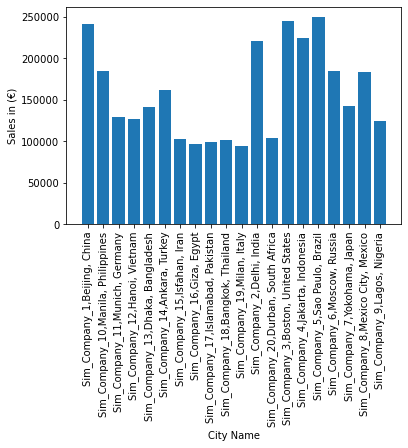

In [23]:
cities = [city for city, annual_df in data_by_bus.groupby('Purchase Country_City')]
plt.bar(cities, data_by_bus['All sales'])

plt.xticks(cities, rotation = 90)
plt.ylabel("Sales in (€)")
plt.xlabel('City Name')
plt.show()

In [24]:
annual_df.dtypes

Order ID                           int64
Phone                             object
Quatity Ordered                    int32
Price Each                         int32
Order Date                        object
Purchase Country_City             object
Month                              int32
No Discount - Single Purchase    float64
Sales_Less_Discount(8%)          float64
Sales_Less_Discount(15%)         float64
All sales                        float64
dtype: object

## Time Analysis

In [27]:
time_ana = annual_df
time_ana

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales
1142,124589,Samsung Galexy S22,3,1100,01/01/22 04:34,"Sim_Company_4,Jakarta, Indonesia",1,NaN,3036.0,NaN,3036.0
1300,124747,iPhone 11,1,500,01/01/22 07:38,"Sim_Company_2,Delhi, India",1,500.0,NaN,NaN,500.0
1294,124741,Sony Xperia 10,2,700,01/01/22 10:42,"Sim_Company_2,Delhi, India",1,NaN,1288.0,NaN,1288.0
1195,124642,Samsung Galexy S22,1,1100,01/01/22 15:26,"Sim_Company_14,Ankara, Turkey",1,1100.0,NaN,NaN,1100.0
1219,124666,iPhone 11,1,500,01/01/22 17:24,"Sim_Company_11,Munich, Germany",1,500.0,NaN,NaN,500.0
...,...,...,...,...,...,...,...,...,...,...,...
730,127214,Huawei,1,350,31/12/22 18:47,"Sim_Company_7,Yokohama, Japan",12,350.0,NaN,NaN,350.0
583,127067,iPhone 11,1,500,31/12/22 19:12,"Sim_Company_3,Boston, United States",12,500.0,NaN,NaN,500.0
650,127134,Huawei,3,350,31/12/22 19:50,"Sim_Company_7,Yokohama, Japan",12,NaN,966.0,NaN,966.0
851,127335,Samsung Galexy S22,1,1100,31/12/22 22:29,"Sim_Company_12,Hanoi, Vietnam",12,1100.0,NaN,NaN,1100.0


In [28]:
time_ana['Order Date'] = pd.to_datetime(time_ana['Order Date'])

In [29]:
time_ana.dtypes

Order ID                                  int64
Phone                                    object
Quatity Ordered                           int32
Price Each                                int32
Order Date                       datetime64[ns]
Purchase Country_City                    object
Month                                     int32
No Discount - Single Purchase           float64
Sales_Less_Discount(8%)                 float64
Sales_Less_Discount(15%)                float64
All sales                               float64
dtype: object

In [30]:
time_ana['Hour'] = time_ana['Order Date'].dt.hour
time_ana['Minute'] = time_ana['Order Date'].dt.minute
time_ana

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales,Hour,Minute
1142,124589,Samsung Galexy S22,3,1100,2022-01-01 04:34:00,"Sim_Company_4,Jakarta, Indonesia",1,NaN,3036.0,NaN,3036.0,4,34
1300,124747,iPhone 11,1,500,2022-01-01 07:38:00,"Sim_Company_2,Delhi, India",1,500.0,NaN,NaN,500.0,7,38
1294,124741,Sony Xperia 10,2,700,2022-01-01 10:42:00,"Sim_Company_2,Delhi, India",1,NaN,1288.0,NaN,1288.0,10,42
1195,124642,Samsung Galexy S22,1,1100,2022-01-01 15:26:00,"Sim_Company_14,Ankara, Turkey",1,1100.0,NaN,NaN,1100.0,15,26
1219,124666,iPhone 11,1,500,2022-01-01 17:24:00,"Sim_Company_11,Munich, Germany",1,500.0,NaN,NaN,500.0,17,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,127214,Huawei,1,350,2022-12-31 18:47:00,"Sim_Company_7,Yokohama, Japan",12,350.0,NaN,NaN,350.0,18,47
583,127067,iPhone 11,1,500,2022-12-31 19:12:00,"Sim_Company_3,Boston, United States",12,500.0,NaN,NaN,500.0,19,12
650,127134,Huawei,3,350,2022-12-31 19:50:00,"Sim_Company_7,Yokohama, Japan",12,NaN,966.0,NaN,966.0,19,50
851,127335,Samsung Galexy S22,1,1100,2022-12-31 22:29:00,"Sim_Company_12,Hanoi, Vietnam",12,1100.0,NaN,NaN,1100.0,22,29


In [31]:
time_ana.dtypes

Order ID                                  int64
Phone                                    object
Quatity Ordered                           int32
Price Each                                int32
Order Date                       datetime64[ns]
Purchase Country_City                    object
Month                                     int32
No Discount - Single Purchase           float64
Sales_Less_Discount(8%)                 float64
Sales_Less_Discount(15%)                float64
All sales                               float64
Hour                                      int64
Minute                                    int64
dtype: object

In [32]:
time_ana = time_ana.drop(['No Discount - Single Purchase', 'Sales_Less_Discount(8%)', 'Sales_Less_Discount(15%)'], axis=1)

In [33]:
time_ana.dtypes

Order ID                          int64
Phone                            object
Quatity Ordered                   int32
Price Each                        int32
Order Date               datetime64[ns]
Purchase Country_City            object
Month                             int32
All sales                       float64
Hour                              int64
Minute                            int64
dtype: object

In [34]:
time_ana

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,All sales,Hour,Minute
1142,124589,Samsung Galexy S22,3,1100,2022-01-01 04:34:00,"Sim_Company_4,Jakarta, Indonesia",1,3036.0,4,34
1300,124747,iPhone 11,1,500,2022-01-01 07:38:00,"Sim_Company_2,Delhi, India",1,500.0,7,38
1294,124741,Sony Xperia 10,2,700,2022-01-01 10:42:00,"Sim_Company_2,Delhi, India",1,1288.0,10,42
1195,124642,Samsung Galexy S22,1,1100,2022-01-01 15:26:00,"Sim_Company_14,Ankara, Turkey",1,1100.0,15,26
1219,124666,iPhone 11,1,500,2022-01-01 17:24:00,"Sim_Company_11,Munich, Germany",1,500.0,17,24
...,...,...,...,...,...,...,...,...,...,...
730,127214,Huawei,1,350,2022-12-31 18:47:00,"Sim_Company_7,Yokohama, Japan",12,350.0,18,47
583,127067,iPhone 11,1,500,2022-12-31 19:12:00,"Sim_Company_3,Boston, United States",12,500.0,19,12
650,127134,Huawei,3,350,2022-12-31 19:50:00,"Sim_Company_7,Yokohama, Japan",12,966.0,19,50
851,127335,Samsung Galexy S22,1,1100,2022-12-31 22:29:00,"Sim_Company_12,Hanoi, Vietnam",12,1100.0,22,29


In [62]:
data_by_hr = time_ana.groupby('Hour', as_index=False).count()
data_by_hr.set_index('Purchase Country_City', inplace=False)
data_by_hr.head()

,Hour,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,All sales,Minute
0,0,67,67,67,67,67,67,67,67,67
1,1,38,38,38,38,38,38,38,38,38
2,2,15,15,15,15,15,15,15,15,15
3,3,12,12,12,12,12,12,12,12,12
4,4,17,17,17,17,17,17,17,17,17


In [73]:
hours = [hour for hour, time_ana in time_ana.groupby('Hour')]
hours 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [74]:
df_x = (data_by_hr.groupby(['Hour'], as_index=False).count())
df_x

,Hour,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,All sales,Minute
0,0,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,1,1,1
3,3,1,1,1,1,1,1,1,1,1
4,4,1,1,1,1,1,1,1,1,1
5,5,1,1,1,1,1,1,1,1,1
6,6,1,1,1,1,1,1,1,1,1
7,7,1,1,1,1,1,1,1,1,1
8,8,1,1,1,1,1,1,1,1,1
9,9,1,1,1,1,1,1,1,1,1


In [77]:
df_x.reset_index()
df_x

,Hour,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,All sales,Minute
0,0,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,1,1,1
3,3,1,1,1,1,1,1,1,1,1
4,4,1,1,1,1,1,1,1,1,1
5,5,1,1,1,1,1,1,1,1,1
6,6,1,1,1,1,1,1,1,1,1
7,7,1,1,1,1,1,1,1,1,1
8,8,1,1,1,1,1,1,1,1,1
9,9,1,1,1,1,1,1,1,1,1


InvalidIndexError: (slice(None, None, None), None)

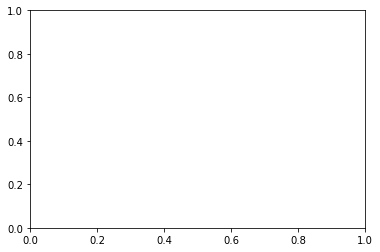

In [79]:
plt.plot(hours, data_by_hr.groupby(['Hour']).count())

In [ ]:
#time_ana.groupby('Hour').count()

hours = np.array(hours)
hours

In [ ]:
plt.plot(hours, time_ana.groupby(['Hour']).count())
plt.show()

In [ ]:
time_ana


In [ ]:
time_ana = time_ana.drop(['No Discount - Single Purchase', 'Sales_Less_Discount(8%)', 'Sales_Less_Discount(15%)'], axis=1)

In [ ]:
time_ana.groupby(['Hour']).count()

In [ ]:
#time_ana.groupby('Hour').count()
hours = [hour for hour, time_ana in time_ana.groupby('Hour')]
hours = np.array(hours)

hours


In [ ]:
plt.plot(hours, time_ana.groupby(['Hour']).count() )
plt.show()